In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('Rome_weather_data.csv', index_col='DATE', low_memory=False)
df.nunique()

STATION              3
NAME                 3
LATITUDE             3
LONGITUDE            3
ELEVATION            3
PRCP               450
PRCP_ATTRIBUTES      8
SNWD                13
SNWD_ATTRIBUTES      1
TAVG               343
TAVG_ATTRIBUTES      1
TMAX               403
TMAX_ATTRIBUTES      7
TMIN               321
TMIN_ATTRIBUTES      9
dtype: int64

In [3]:
df.sort_index(inplace=True)
df.head()

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,PRCP,PRCP_ATTRIBUTES,SNWD,SNWD_ATTRIBUTES,TAVG,TAVG_ATTRIBUTES,TMAX,TMAX_ATTRIBUTES,TMIN,TMIN_ATTRIBUTES
DATE,,,,,,,,,,,,,,,
1951-03-01,IT000016239,"ROMA CIAMPINO, IT",41.7831,12.5831,105.0,0.2,",,E",NaN,NaN,NaN,NaN,13.2,",,E",3.0,",,E"
1951-03-02,IT000016239,"ROMA CIAMPINO, IT",41.7831,12.5831,105.0,0.0,",,E",NaN,NaN,NaN,NaN,10.5,",,E",2.0,",,E"
1951-03-03,IT000016239,"ROMA CIAMPINO, IT",41.7831,12.5831,105.0,0.0,",,E",NaN,NaN,NaN,NaN,8.6,",,E",-1.4,",,E"
1951-03-04,IT000016239,"ROMA CIAMPINO, IT",41.7831,12.5831,105.0,0.0,",,E",NaN,NaN,NaN,NaN,13.6,",,E",-2.0,",,E"
1951-03-05,IT000016239,"ROMA CIAMPINO, IT",41.7831,12.5831,105.0,0.1,",,E",NaN,NaN,NaN,NaN,15.2,",,E",2.7,",,E"


In [4]:
df = df.groupby(df.index).mean()
df.head()

,LATITUDE,LONGITUDE,ELEVATION,PRCP,SNWD,TAVG,TMAX,TMIN
DATE,,,,,,,,
1951-03-01,41.7831,12.5831,105.0,0.2,NaN,NaN,13.2,3.0
1951-03-02,41.7831,12.5831,105.0,0.0,NaN,NaN,10.5,2.0
1951-03-03,41.7831,12.5831,105.0,0.0,NaN,NaN,8.6,-1.4
1951-03-04,41.7831,12.5831,105.0,0.0,NaN,NaN,13.6,-2.0
1951-03-05,41.7831,12.5831,105.0,0.1,NaN,NaN,15.2,2.7


In [5]:
df.isnull().sum()/df.shape[0]

LATITUDE     0.000000
LONGITUDE    0.000000
ELEVATION    0.000000
PRCP         0.007624
SNWD         0.998966
TAVG         0.181327
TMAX         0.004751
TMIN         0.026282
dtype: float64

In [6]:
core_df = df[['PRCP', 'SNWD', 'TMAX', 'TMIN']].copy()

In [7]:
core_df.columns = ['precip', 'snow_depth', 'temp_max', 'temp_min']

In [8]:
core_df.head()

,precip,snow_depth,temp_max,temp_min
DATE,,,,
1951-03-01,0.2,NaN,13.2,3.0
1951-03-02,0.0,NaN,10.5,2.0
1951-03-03,0.0,NaN,8.6,-1.4
1951-03-04,0.0,NaN,13.6,-2.0
1951-03-05,0.1,NaN,15.2,2.7


In [9]:
core_df.isnull().sum()/core_df.shape[0]

precip        0.007624
snow_depth    0.998966
temp_max      0.004751
temp_min      0.026282
dtype: float64

In [10]:
del core_df['snow_depth']

In [11]:
core_df.loc['1978-10-10':'1978-10-25',:]

,precip,temp_max,temp_min
DATE,,,
1978-10-10,9.6,22.25,12.10
1978-10-11,0.0,24.10,11.90
1978-10-12,0.0,25.20,12.50
1978-10-13,0.0,24.85,12.75
1978-10-14,NaN,23.70,12.40
1978-10-15,NaN,23.25,11.45
1978-10-16,0.0,21.85,11.10
1978-10-17,NaN,20.20,9.90
1978-10-18,NaN,20.40,12.60


In [12]:
core_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
precip,25903.0,2.251032,6.821218,0.00,0.0,0.0,0.50,213.0
temp_max,25978.0,20.821832,20.607915,-2.15,14.1,19.6,26.50,999.0
temp_min,25416.0,11.679143,24.055091,-7.70,5.9,10.6,15.95,999.0


In [13]:
core_df.apply(pd.isnull).sum()

precip      199
temp_max    124
temp_min    686
dtype: int64

In [14]:
core_df.index = pd.to_datetime(core_df.index)

<AxesSubplot:xlabel='DATE'>

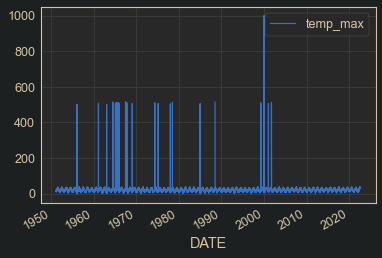

In [15]:
core_df[['temp_max']].plot()

In [16]:
core_df.apply(lambda x: (x==999).sum())

precip      0
temp_max    3
temp_min    4
dtype: int64

In [17]:
core_df[core_df['temp_max'] == 999] = np.nan
core_df[core_df['temp_min'] == 999] = np.nan

In [18]:
core_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
precip,25903.0,2.251032,6.821218,0.00,0.0,0.0,0.50,213.0
temp_max,25974.0,20.709138,17.726202,-2.15,14.1,19.6,26.50,515.2
temp_min,25412.0,11.523733,20.622042,-7.70,5.9,10.6,15.95,508.7


In [19]:
def IQR_calc(column):
    Q1 = core_df[column].quantile(0.25)
    Q3 = core_df[column].quantile(0.75)
    return Q3 - Q1

In [20]:
IQR_temp_min = IQR_calc('temp_min')

lower_lim_min = core_df['temp_min'].quantile(0.25) - 5 * IQR_temp_min
upper_lim_min = core_df['temp_min'].quantile(0.75) + 5 * IQR_temp_min

IQR_temp_max = IQR_calc('temp_max')

lower_lim_max = core_df['temp_max'].quantile(0.25) - 5 *IQR_temp_max
upper_lim_max = core_df['temp_max'].quantile(0.75) + 5 *IQR_temp_max

In [21]:
core_df.loc[core_df['temp_max'] > upper_lim_max, 'temp_max'] = np.nan
core_df.loc[core_df['temp_max'] < lower_lim_max, 'temp_max'] = np.nan
core_df.loc[core_df['temp_min'] > upper_lim_min, 'temp_min'] = np.nan
core_df.loc[core_df['temp_min'] < lower_lim_max, 'temp_min'] = np.nan
#core_df.loc[core_df['precip'] > upper_lim_precip, 'precip'] = np.nan
#core_df.loc[core_df['precip'] < lower_lim_precip, 'precip'] = np.nan


In [22]:
core_df.ffill(axis=0, inplace=True)

In [23]:
core_df['target'] = core_df.shift(-1)['temp_max']

In [24]:
core_df

,precip,temp_max,temp_min,target
DATE,,,,
1951-03-01,0.20,13.200000,3.000000,10.500000
1951-03-02,0.00,10.500000,2.000000,8.600000
1951-03-03,0.00,8.600000,-1.400000,13.600000
1951-03-04,0.00,13.600000,-2.000000,15.200000
1951-03-05,0.10,15.200000,2.700000,18.000000
...,...,...,...,...
2022-08-15,0.00,30.633333,20.366667,31.266667
2022-08-16,0.50,31.266667,21.666667,33.500000
2022-08-17,0.15,33.500000,23.400000,34.800000


In [25]:
core_df = core_df.iloc[:-1,:].copy()

In [26]:
core_df

,precip,temp_max,temp_min,target
DATE,,,,
1951-03-01,0.20,13.200000,3.000000,10.500000
1951-03-02,0.00,10.500000,2.000000,8.600000
1951-03-03,0.00,8.600000,-1.400000,13.600000
1951-03-04,0.00,13.600000,-2.000000,15.200000
1951-03-05,0.10,15.200000,2.700000,18.000000
...,...,...,...,...
2022-08-14,0.00,31.450000,17.800000,30.633333
2022-08-15,0.00,30.633333,20.366667,31.266667
2022-08-16,0.50,31.266667,21.666667,33.500000


In [27]:
from sklearn.linear_model import Ridge
reg = Ridge(alpha=0.1)

In [28]:
predictors = ['precip', 'temp_max', 'temp_min']

In [29]:
train = core_df.loc[:'2020-12-31']
test = core_df.loc['2021-01-01':]
test

,precip,temp_max,temp_min,target
DATE,,,,
2021-01-01,6.40,11.750000,4.133333,13.000000
2021-01-02,27.95,13.000000,4.133333,13.000000
2021-01-03,29.95,13.000000,4.133333,11.266667
2021-01-04,11.05,11.266667,3.800000,9.400000
2021-01-05,27.60,9.400000,7.000000,10.700000
...,...,...,...,...
2022-08-14,0.00,31.450000,17.800000,30.633333
2022-08-15,0.00,30.633333,20.366667,31.266667
2022-08-16,0.50,31.266667,21.666667,33.500000


In [30]:
reg.fit(train[predictors], train['target'])

Ridge(alpha=0.1)

In [31]:
predictions = reg.predict(test[predictors])

In [32]:
from sklearn.metrics import mean_absolute_error

In [33]:
mean_absolute_error(test['target'], predictions)

1.4014025026125272

In [34]:
combined = pd.concat([test['target'], pd.Series(predictions, index=test.index)], axis=1)
combined.columns = ['actual', 'prediction']

<AxesSubplot:xlabel='DATE'>

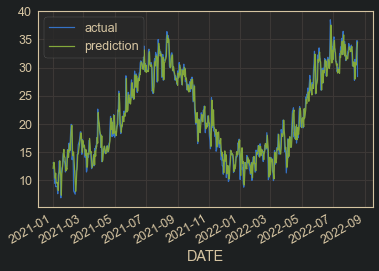

In [35]:
combined.plot()

In [36]:
reg.coef_

array([-0.00164009,  0.87332126,  0.11418208])

In [37]:
def create_predictions(predictors, core_df, reg):
    train = core_df.loc[:'2020-12-31']
    test = core_df.loc['2021-01-01':]
    reg.fit(train[predictors], train['target'])
    predictions = reg.predict(test[predictors])
    error = mean_absolute_error(test['target'], predictions)
    combined = pd.concat([test['target'], pd.Series(predictions, index=test.index)], axis=1)
    combined.columns = ['actual', 'predictions']
    return error, combined

In [38]:
core_df['month_max'] = core_df['temp_max'].rolling(30).mean()

In [39]:
core_df.tail()

,precip,temp_max,temp_min,target,month_max
DATE,,,,,
2022-08-14,0.00,31.450000,17.800000,30.633333,32.686667
2022-08-15,0.00,30.633333,20.366667,31.266667,32.636667
2022-08-16,0.50,31.266667,21.666667,33.500000,32.556667
2022-08-17,0.15,33.500000,23.400000,34.800000,32.573333
2022-08-18,0.00,34.800000,24.300000,28.400000,32.560000


In [40]:
core_df['month_day_max'] = core_df['month_max'] - core_df['temp_max']

In [41]:
core_df['max_min'] = core_df['temp_max'] - core_df['temp_min']

In [42]:
core_df

,precip,temp_max,temp_min,target,month_max,month_day_max,max_min
DATE,,,,,,,
1951-03-01,0.20,13.200000,3.000000,10.500000,NaN,NaN,10.200000
1951-03-02,0.00,10.500000,2.000000,8.600000,NaN,NaN,8.500000
1951-03-03,0.00,8.600000,-1.400000,13.600000,NaN,NaN,10.000000
1951-03-04,0.00,13.600000,-2.000000,15.200000,NaN,NaN,15.600000
1951-03-05,0.10,15.200000,2.700000,18.000000,NaN,NaN,12.500000
...,...,...,...,...,...,...,...
2022-08-14,0.00,31.450000,17.800000,30.633333,32.686667,1.236667,13.650000
2022-08-15,0.00,30.633333,20.366667,31.266667,32.636667,2.003333,10.266667
2022-08-16,0.50,31.266667,21.666667,33.500000,32.556667,1.290000,9.600000


In [43]:
core_df = core_df.iloc[30:,:].copy()

In [44]:
max(core_df['month_day_max'])

13.648333333333335

In [45]:
predictors = ['precip', 'temp_max', 'temp_min', 'month_max', 'month_day_max', 'max_min']

In [46]:
error, combined = create_predictions(predictors, core_df, reg)

In [47]:
error

1.3692859035169536

<AxesSubplot:xlabel='DATE'>

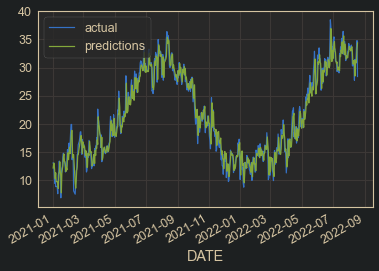

In [48]:
combined.plot()

In [49]:
core_df['monthly_avg'] = core_df['temp_max'].groupby(core_df.index.month).apply(lambda x: x.expanding(1).mean())

In [50]:
core_df['day_of_year_avg'] = core_df['temp_max'].groupby(core_df.index.day_of_year).apply(lambda x: x.expanding(1).mean())

In [51]:
core_df

,precip,temp_max,temp_min,target,month_max,month_day_max,max_min,monthly_avg,day_of_year_avg
DATE,,,,,,,,,
1951-03-31,2.80,14.800000,6.400000,17.000000,15.510000,0.710000,8.400000,14.800000,14.800000
1951-04-01,1.00,17.000000,4.800000,16.800000,15.726667,-1.273333,12.200000,17.000000,17.000000
1951-04-02,0.00,16.800000,4.500000,15.500000,16.000000,-0.800000,12.300000,16.900000,16.800000
1951-04-03,0.00,15.500000,4.800000,16.200000,16.063333,0.563333,10.700000,16.433333,15.500000
1951-04-04,0.10,16.200000,5.200000,20.000000,16.096667,-0.103333,11.000000,16.375000,16.200000
...,...,...,...,...,...,...,...,...,...
2022-08-14,0.00,31.450000,17.800000,30.633333,32.686667,1.236667,13.650000,30.138427,30.732870
2022-08-15,0.00,30.633333,20.366667,31.266667,32.636667,2.003333,10.266667,30.138651,30.769213
2022-08-16,0.50,31.266667,21.666667,33.500000,32.556667,1.290000,9.600000,30.139160,30.720602


In [52]:
predictors

['precip', 'temp_max', 'temp_min', 'month_max', 'month_day_max', 'max_min']

In [53]:
predictors = predictors + ['monthly_avg', 'day_of_year_avg']

In [55]:
error, combined = create_predictions(predictors, core_df, reg)

In [56]:
error

1.3552796032906749

In [57]:
reg.coef_

array([-0.00880023,  0.36526798,  0.21557893,  0.17853438, -0.18673359,
        0.14968906,  0.08366777,  0.16616444])

In [58]:
core_df.corr()['target']

precip            -0.157114
temp_max           0.961606
temp_min           0.904751
target             1.000000
month_max          0.895048
month_day_max     -0.295884
max_min            0.544018
monthly_avg        0.911478
day_of_year_avg    0.924933
Name: target, dtype: float64

In [59]:
combined['diff'] = (combined['actual'] - combined['predictions'].abs())

In [60]:
combined.sort_values('diff', ascending=False).head()

,actual,predictions,diff
DATE,,,
2022-06-26,38.500000,32.178265,6.321735
2021-03-29,22.600000,16.360607,6.239393
2021-11-06,24.633333,18.812522,5.820811
2021-05-23,28.533333,22.769893,5.763440
2022-06-01,32.233333,27.347931,4.885403


<AxesSubplot:xlabel='DATE'>

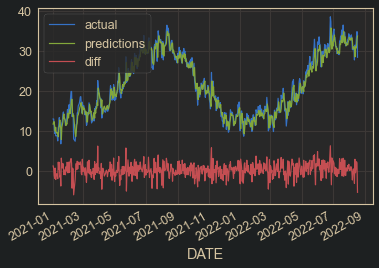

In [61]:
combined.plot()